In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
import numpy as np

# X: [time, sample, variable]
X = np.load('../data/actual_data/csf_longtid.npy')
# drop variable 9

X_clean = X.copy()
mu = np.nanmean(X_clean, axis=(0,1))      # mean per variable
sigma = np.nanstd(X_clean, axis=(0,1))    # std per variable
X_norm = (X_clean - mu) / sigma

X_norm = X_norm[0]
# X_norm[:, 9] = np.log(X_norm[:,9] + abs(np.nanmin(X_norm[:,9])) + 1)
# X_norm[:,8] = np.log(X_norm[:,8] + abs(np.nanmin(X_norm[:,8])) + 1)
# X_norm[:, 10] = np.log(X_norm[:,10] + abs(np.nanmin(X_norm[:,10])) + 1)


for v in range(X_norm.shape[1]):
    var = X_norm[:, v]
    med = np.nanmedian(var)
    mad = np.nanmedian(np.abs(var - med))
    if mad == 0:
        continue
    z = 0.6745 * (var - med) / mad
    mask = np.abs(z) > 4
    var[mask] = np.nan
    X_norm[:, v] = var

X_norm = X_norm[np.all(~np.isnan(X_norm), axis=1)]
print(X_norm.shape)
# X_norm = np.delete(X_norm, 10, axis=1)
# X_norm = np.delete(X_norm, 4, axis=1)
# X_norm = np.delete(X_norm, 5, axis=1)
# X_norm = np.delete(X_norm, 5, axis=1)
X_norm = np.delete(X_norm, -1, axis=1)


(1025, 13)


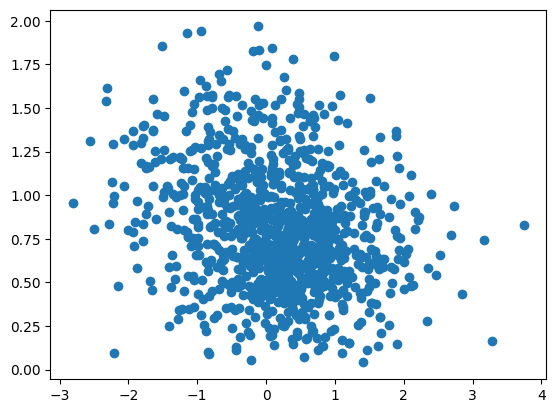

In [3]:
plt.scatter(X_norm[:,5], X_norm[:,9])

In [3]:
cols = ['RID', 'EXAMDATE_x',  'AGE','PTGENDER', 'PTEDUCAT',  'APOE41',

       'Intracranial Volume', 'Hippocampus', 'Amygdala', 'Temporal Lobe',
'ABETA42', 'TAU', 'PTAU',
       'TOTAL13', 'MMSCORE']

In [4]:
cols = ['AGE','PTGENDER', 'PTEDUCAT',  'APOE41',
'Hippocampus',
'ABETA42', 'PTAU',
       'TOTAL13']

In [5]:
tier1 = cols[:4]
tier2 = cols[4]
tier3 = cols[5:8]
tier4 = cols[8:10]
tier5 = cols[10:]

In [6]:
static_idx = [0,1,2,3]
res = []

# add forbidden edges based on tiers in the shape of (incoming, outgoing) - no edges from lower to higher tiers
# for i in range(len(cols)):
#     for j in range(len(cols)):
#         if (cols[i] in tier2 and cols[j] in tier1) or \
#            (cols[i] in tier3 and cols[j] in tier1) or (cols[i] in tier3 and cols[j] in tier2) or \
#            (cols[i] in tier4 and cols[j] in tier1) or (cols[i] in tier4 and cols[j] in tier2) or (cols[i] in tier4 and cols[j] in tier3) or \
#            (cols[i] in tier5 and cols[j] in tier1) or (cols[i] in tier5 and cols[j] in tier2) or (cols[i] in tier5 and cols[j] in tier3) or (cols[i] in tier5 and cols[j] in tier4):
#             res.append((j,i))


In [7]:
# show number of nan values per variable
nan_counts = np.sum(np.isnan(X_norm), axis=1)

In [8]:
from mcmc_bspline_speed_mod import BN_LTE_MCMC_BSpline_Optimized

sampler = BN_LTE_MCMC_BSpline_Optimized(X_norm, seed=0, static_features=static_idx, forbidden_edges=res,
                                            K_edge=5, K_baseline=5,  degree=3)

chain   = sampler.run(n_iter=1000, burnin=100, thin=2)

/opt/miniconda3/envs/causallearn/lib/python3.13/site-packages/sklearn/decomposition/_pca.py:606: RuntimeWarning: divide by zero encountered in matmul
  C = X.T @ X
/opt/miniconda3/envs/causallearn/lib/python3.13/site-packages/sklearn/decomposition/_pca.py:606: RuntimeWarning: overflow encountered in matmul
  C = X.T @ X
/opt/miniconda3/envs/causallearn/lib/python3.13/site-packages/sklearn/decomposition/_pca.py:606: RuntimeWarning: invalid value encountered in matmul
  C = X.T @ X
/opt/miniconda3/envs/causallearn/lib/python3.13/site-packages/sklearn/decomposition/_base.py:148: RuntimeWarning: divide by zero encountered in matmul
  X_transformed = X @ self.components_.T
/opt/miniconda3/envs/causallearn/lib/python3.13/site-packages/sklearn/decomposition/_base.py:148: RuntimeWarning: overflow encountered in matmul
  X_transformed = X @ self.components_.T
/opt/miniconda3/envs/causallearn/lib/python3.13/site-packages/sklearn/decomposition/_base.py:148: RuntimeWarning: invalid value encounter

PCA direction: 1.0


/Users/nataliaglazman/Desktop/PhD/work/bnlte-extension/scripts/mcmc_bspline_speed_mod.py:608: RuntimeWarning: divide by zero encountered in matmul
  y -= D[:, mask] @ self.state.beta[j, l, mask]
/Users/nataliaglazman/Desktop/PhD/work/bnlte-extension/scripts/mcmc_bspline_speed_mod.py:608: RuntimeWarning: overflow encountered in matmul
  y -= D[:, mask] @ self.state.beta[j, l, mask]
/Users/nataliaglazman/Desktop/PhD/work/bnlte-extension/scripts/mcmc_bspline_speed_mod.py:608: RuntimeWarning: invalid value encountered in matmul
  y -= D[:, mask] @ self.state.beta[j, l, mask]
/Users/nataliaglazman/Desktop/PhD/work/bnlte-extension/scripts/mcmc_bspline_speed_mod.py:620: RuntimeWarning: divide by zero encountered in matmul
  Qt = D_act.T @ D_act / sig2 + np.eye(mask.sum()) / ((self.state.sigma3))
/Users/nataliaglazman/Desktop/PhD/work/bnlte-extension/scripts/mcmc_bspline_speed_mod.py:620: RuntimeWarning: overflow encountered in matmul
  Qt = D_act.T @ D_act / sig2 + np.eye(mask.sum()) / ((self

iter    10 │ z‑accept = 31.54% │ z‑step = 0.2000
iter    20 │ z‑accept = 26.11% │ z‑step = 0.2100
iter    30 │ z‑accept = 25.80% │ z‑step = 0.2205
iter    40 │ z‑accept = 24.49% │ z‑step = 0.2315
iter    50 │ z‑accept = 22.88% │ z‑step = 0.2199
iter    60 │ z‑accept = 19.40% │ z‑step = 0.2090
iter    70 │ z‑accept = 16.73% │ z‑step = 0.1985
iter    80 │ z‑accept = 16.68% │ z‑step = 0.1886
iter    90 │ z‑accept = 15.48% │ z‑step = 0.1791
iter   100 │ z‑accept = 14.72% │ z‑step = 0.1702
iter   110 │ z‑accept = 15.92% │ z‑step = 0.1617
iter   120 │ z‑accept = 16.37% │ z‑step = 0.1536
iter   130 │ z‑accept = 16.68% │ z‑step = 0.1459
iter   140 │ z‑accept = 16.32% │ z‑step = 0.1386
iter   150 │ z‑accept = 17.44% │ z‑step = 0.1317
iter   160 │ z‑accept = 18.07% │ z‑step = 0.1251
iter   170 │ z‑accept = 18.01% │ z‑step = 0.1189
iter   180 │ z‑accept = 19.22% │ z‑step = 0.1129
iter   190 │ z‑accept = 19.68% │ z‑step = 0.1073
iter   200 │ z‑accept = 20.62% │ z‑step = 0.1019
iter   210 │ z‑accep

In [9]:
cols = ['AGE','PTGENDER', 'PTEDUCAT',  'APOE41',

       'Intracranial Volume', 'Hippocampus', 'Amygdala', 'Temporal Lobe',
'ABETA42', 'PTAU',
       'TOTAL13', 'MMSCORE']

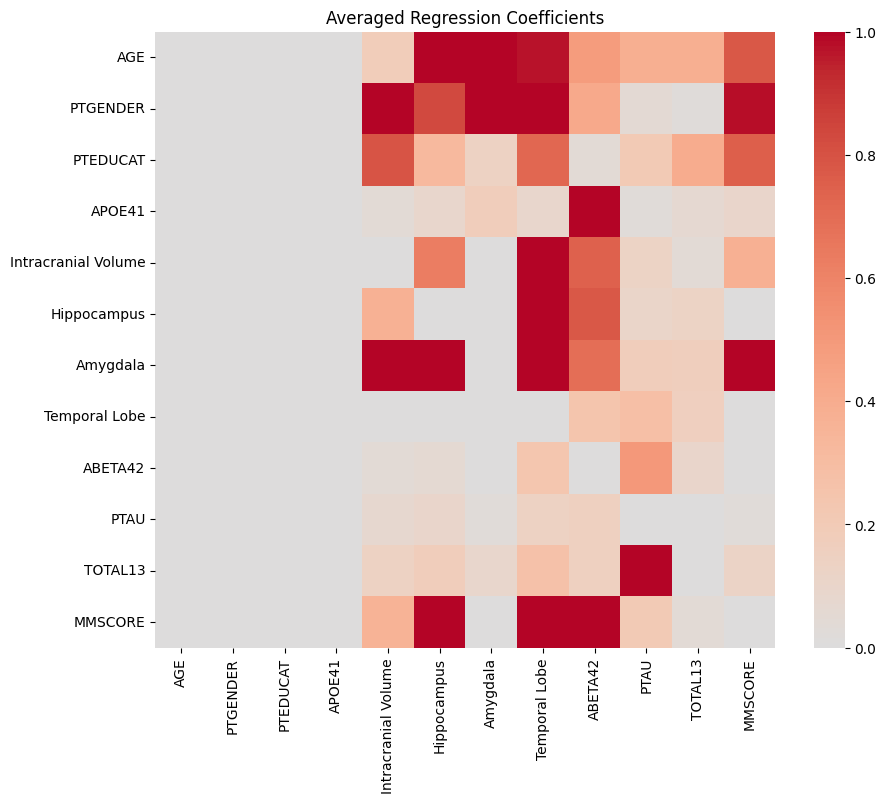

In [10]:
beta_averaged = np.mean([sampler.state.r.any(axis=2) for sampler.state in chain], axis=0)
import seaborn as sns
plt.figure(figsize=(10,8))
sns.heatmap(beta_averaged.T, cmap='coolwarm', center=0,
            xticklabels=cols, yticklabels=cols)
plt.title('Averaged Regression Coefficients')
plt.show()

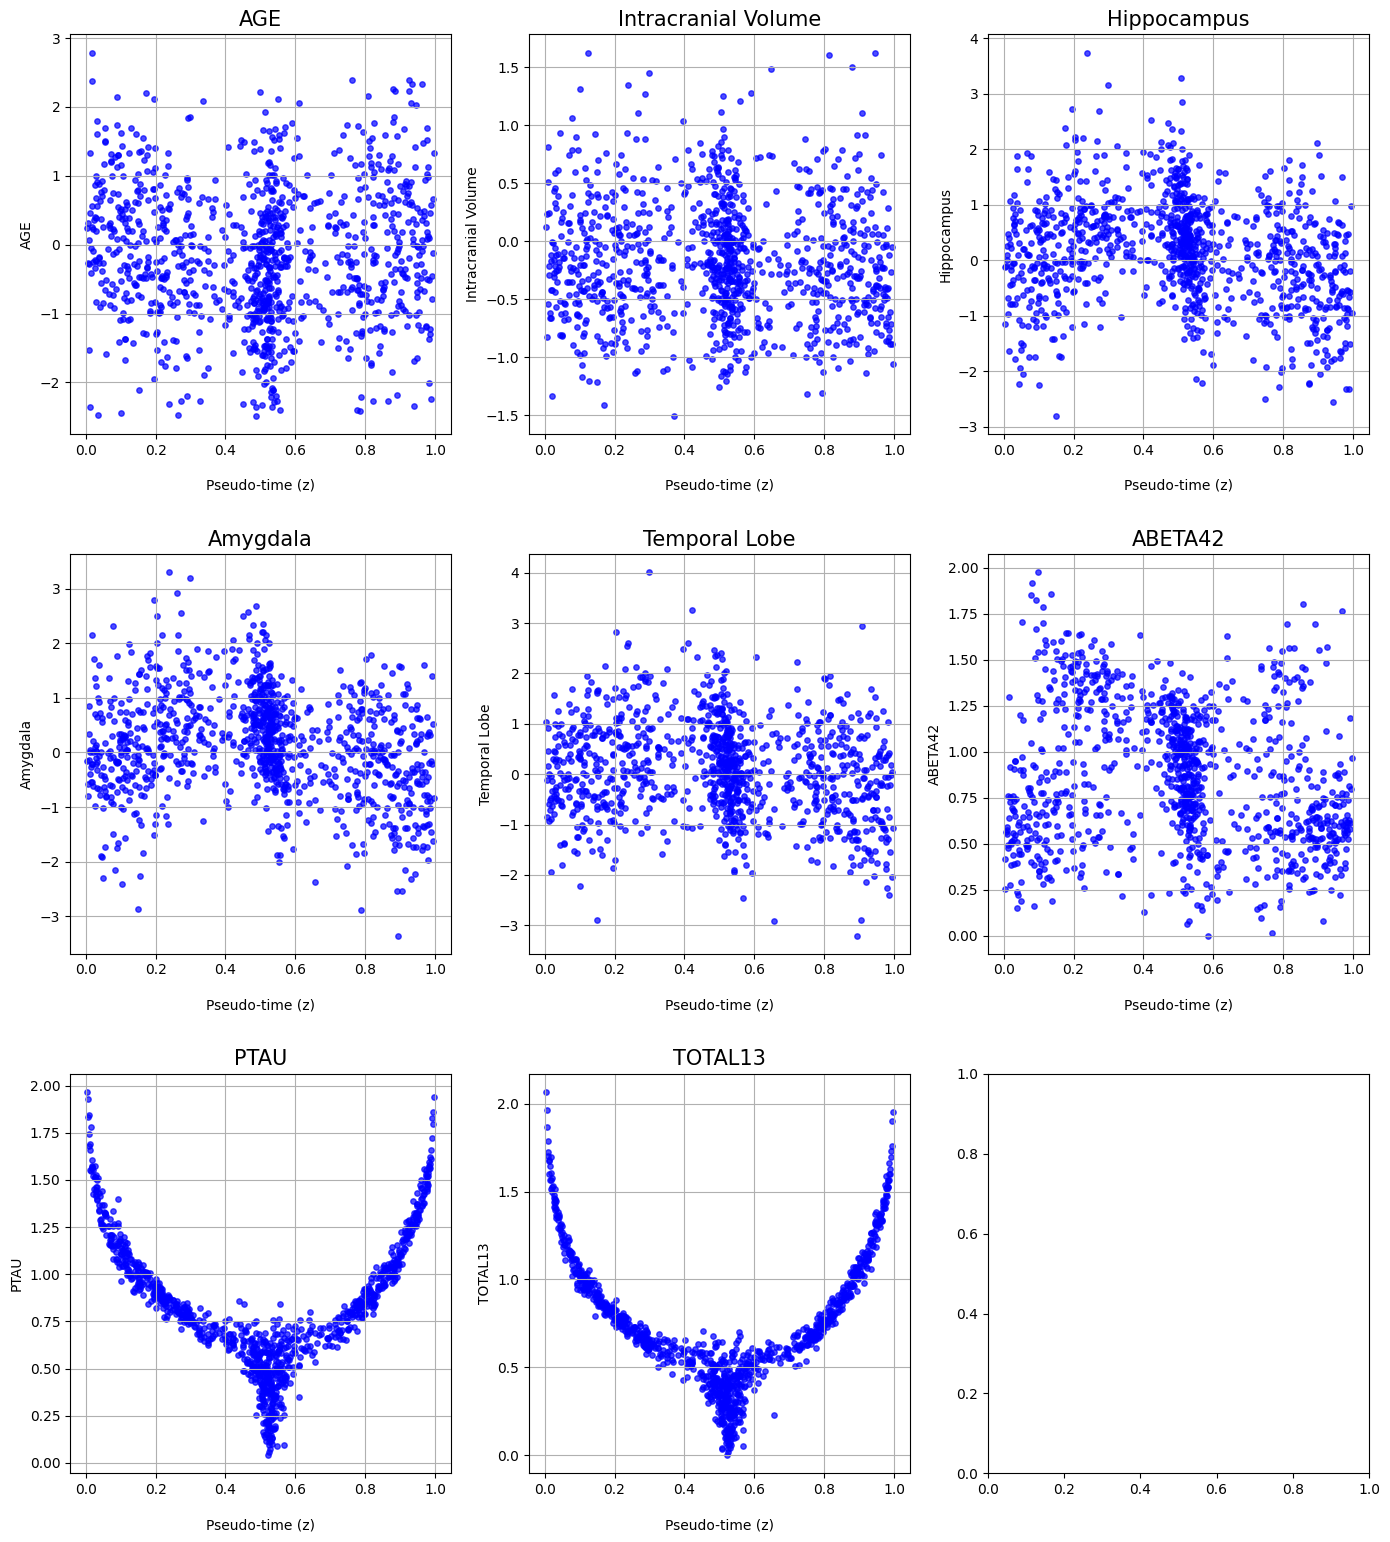

In [11]:
draws1 = chain

# Increase global font size
plt.rcParams.update({
    'font.size': 10,
    'axes.titlesize': 10,
    'axes.labelsize': 10,
    'legend.fontsize': 10,
    'xtick.labelsize': 10,
    'ytick.labelsize': 10,
})

cmap = plt.get_cmap('tab10')

# all_z = np.vstack([ state.z_time[1,:] for state in draws1 ])  

# z_filtered = all_z.mean(axis=0)  

all_z_time = np.vstack([ state.z for state in draws1 ])
z_time_filtered = all_z_time.mean(axis=0)
print

data_filtered = np.array(X_norm)
fig, axes = plt.subplots(3, 3, figsize=(14, 16), sharex=False)
axes = axes.flatten()
biomarkers = [0,4,5,6,7,8,9,10]  # Adjust to match your data
axis = 0

for i in biomarkers:
    ax = axes[axis]
    axis += 1
    ax.scatter(
        z_time_filtered,
        X_norm[:, i],
        s=15,
        alpha=0.7,
        c = 'blue',

    )

    ax.set_title(f'{cols[i]}', fontsize=15)
    ax.set_xlabel('Pseudo-time (z)', labelpad=15)
    ax.set_ylabel(f'{cols[i]}', fontsize=10)
    ax.grid(True)


plt.tight_layout(rect=[0, 0, 1, 0.97])
fig.subplots_adjust(hspace=0.3)  # increase vertical spacing

plt.show()